## Apply Baseline on the Dataset

Info file Tree :

AMstP_EPBW_WeakDet 

    raw
       audio
           50_500    ------------------------------------> contains all wavefile and a csv file for timestamp     
       metadata.csv  ------------------------------------> some metadata about dataset
    final
        Annotation_Aplose  ------------------------------> contains csv file with all original annotation
    AI
        Task1c_DetWeakLabel_1Spe  -----------------------> name of the Task
            Det_EPBW_Baseline ---------------------------> contains all the model for Baseline
                50_500
                    info_datasplit ----------------------> contains annotation file split for the task
                        Allannottaions.csv
                        Annotations_metadata.csv/.npz ---> metadata about annotation
                        Split_TestEval  -----------------> contains annotations splited
                            DEVannotations.csv  ---------> annotations for the developpment set
                            EVALannotations.csv  --------> annotations for the evaluation set
                    model  ------------------------------> contains folder for each model trainned
                        ModelName
                            hyper_parameters  -----------> contains metadata with parameters of the model
                            model_state -----------------> contains all model states at each epoch
                            train_curves ----------------> contains train curves and curves for evaluations merics
                    
        

### 1. Import librairies and functions

In [1]:
import os 
import sys
import numpy as np

with open('path_codes.txt') as f:
    codes_path = f.readlines()[0]
os.chdir(os.path.join(codes_path))

from TrainNetwork import TrainNetwork_main 
from Check_files_in_AI_folders import CheckAvailableAI_tasks_BM_model, CheckAvailableAI_DataSplit, CheckAvailableAI_TrainedNetwork
from ApplyModelOnEvalSet import ApplyModelOnEvalSet_main, LoadModelHyperParameters


### 2. Define some variables and parameters

In [2]:
# Parameters and label of the dataset
dataset_ID = 'AMstP_EPBW_WeakDet'
Task_ID = 'Task1c_DetWeakLabel_1Spe'
BM_Name = 'Det_EPBW_Baseline'
analysis_fs = 500 #Hz
LengthFile = 50 #s
SplitName = 'Split_TestEval'

# Parameters for the computation of the spectrograms
param_spectro = {'nfft' : [500], 'winsize' : [200], 'pct_overlap' : [50], 'Dyn' : np.array([-20, 20])}

# Labelization and parameters for the network
Version_name = 'resnet50_v1' # User's choice
ModelName = 'resnet50' #Also available : ['CNN3_FC3', resnet18', 'resnet50', 'resnet101', 'vgg11', 'vgg11_bn', 'vgg13', 'vgg13_bn', 'vgg19', 'vgg19_bn', 'alexnet']
use_pretrained = True #Useless for 'CNN3_FC1' and 'CNN3_FC3'
TrainSetRatio = 0.8
batch_size = 10
learning_rate = 5e-4
num_epochs = 40

### 3. Train network

MODEL INFORMATION : 
 
ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_s

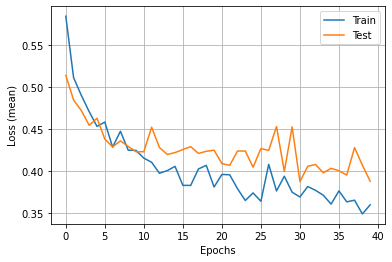

In [8]:
TrainNetwork_main(dataset_ID=dataset_ID, Task_ID=Task_ID, BM_Name=BM_Name, LengthFile=LengthFile, Fs=analysis_fs, SplitName=SplitName, Version_name=Version_name, ModelName=ModelName, use_pretrained=use_pretrained, TrainSetRatio=TrainSetRatio, batch_size = batch_size, learning_rate=learning_rate, num_epochs=num_epochs, param_spectro = param_spectro)

In [3]:
print('MODELS AVAILABLE : ')
CheckAvailableAI_TrainedNetwork(dataset_ID, Task_ID, BM_Name, LengthFile, analysis_fs)

MODELS AVAILABLE : 
models/
    cnn_fc1/
    resnet50_v1/


In [4]:
VersionName = 'cnn_fc1'
Dyn, batch_size, learning_rate, LabelsList, ModelName, use_pretrained, SplitName, TrainSetRatio = LoadModelHyperParameters(dataset_ID, Task_ID, BM_Name, LengthFile, analysis_fs, VersionName)


100%|███████████████████████████████████████████████████████████████████████████| 27444/27444 [03:41<00:00, 123.93it/s]


F score maximal :  [0.81128474]
Threshold :  0.18522613065326632
Precision :  [0.83376241]
Recall :  [0.78998722]


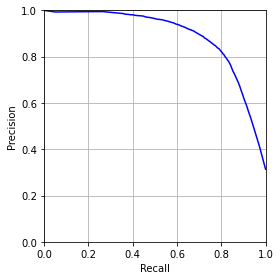

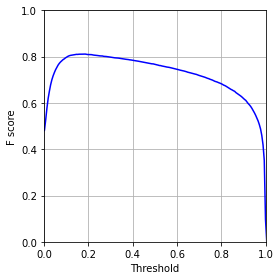

In [5]:
ApplyModelOnEvalSet_main(dataset_ID, Task_ID, BM_Name, LengthFile, analysis_fs, VersionName, param_spectro, list(LabelsList), str(SplitName))